#Case Study 1 : Collecting Data from Twitter

** Due Date: February 10, before the class**

*------------

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

    Branden Diniz
    
    Xuanyu Li
    
    Dennis Silva
    
    Chuxin Wei

**Required Readings:** 
* Chapter 1 and Chapter 9 of the book [Mining the Social Web](http://www.learndatasci.com/wp-content/uploads/2015/08/Mining-the-Social-Web-2nd-Edition.pdf) 
* The codes for [Chapter 1](http://bit.ly/1qCtMrr) and [Chapter 9](http://bit.ly/1u7eP33)


** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

#Problem 1: Sampling Twitter Data with Streaming API about a certain topic

* Select a topic that you are interested in, for example, "WPI" or "Lady Gaga"
* Use Twitter Streaming API to sample a collection of tweets about this topic in real time. (It would be recommended that the number of tweets should be larger than 200, but smaller than 1 million.
* Store the tweets you downloaded into a local file (txt file or json file) 

NOTES Before Running:
    *Need basic canopy packages (install all canopy packages before continuing)
        Additionally install prettytable 0.7.x package to use pretty table
        Additionally install nltk 3.1 package to utilize the Natural Language Toolkit
    *The notebook is structured to run each cell in order except for the cell containing "twitter_streaming_search."
        The first cell for Question 2 contains a line for "filename." This is the filename of a text file containing tweets
        in the form of json that will be analyzed by all following cells.

In [2]:
"""
Run this cell to acquire twitter login credentials (twitter_api) for future cells.
    Change each key to your own to minimize rate limiting.
"""
import twitter
from urllib import unquote
import json
import math
#---------------------------------------------
# Define a Function to Login Twitter API
def oauth_login():
    # Go to http://twitter.com/apps/new to create an app and get values
    # for these credentials that you'll need to provide in place of these
    # empty string values that are defined as placeholders.
    # See https://dev.twitter.com/docs/auth/oauth for more information 
    # on Twitter's OAuth implementation.
    
    CONSUMER_KEY = '1Y71E7ltFJjaouxc04YAdYcFG'
    CONSUMER_SECRET ='KO9VifpzCanKjlfCzX2KGpjheCkPYzhzygKLQvbPmm0r88qGwr'
    OAUTH_TOKEN = '467864818-LAMaMeV50N8opXd18InibfDmxJ3QQiu1j2N0SS4E'
    OAUTH_TOKEN_SECRET = '7MOHEBrgdCQAjVAWbLEhNV6FoD98TdzinmAFMaleBoz0N'
    
    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                               CONSUMER_KEY, CONSUMER_SECRET)
    
    twitter_api = twitter.Twitter(auth=auth)
    return twitter_api

twitter_api = oauth_login

In [6]:
import twitter
from urllib import unquote
import json, sys

"""
Use twitter streaming api to search for tweets through Streaming API instead of the RESTful api to gather data
in real-time and limit the # of tweets to certain amount.

twitter_api:  oauth_login authentication
q:  hot topic name 
max_results: max number of tweets to collect (you may not collect max_results every time)
"""
def twitter_streaming_search(twitter_api, q, max_results):
    
    # Reference the self.auth parameter
    twitter_stream = twitter.TwitterStream(auth=twitter_api.auth)

    # See https://dev.twitter.com/docs/streaming-apis
    stream = twitter_stream.statuses.filter(track=q)

     # set the maximum searching results first [200, 100,0000]
    tweets = [] # searching results
    for tweet in stream:
        # check if the tweet is an empty tweet
        if 'text' in tweet:
            tweets.append(tweet)
            
        if len(tweets) >= max_results:
            break;

    return tweets

# save the data returned by twitter_streaming_search into json file
def save_json(filename, data):
    with open(filename, 'w') as f:
        f.write(unicode(json.dumps(data, indent=1)))


"""
Obtain authorization to twitter api and search for hot topic
"""
twitter_api = oauth_login()
q = 'Pokemon'
max_results = 1000
    
data = twitter_streaming_search(twitter_api, q)
save_json("Pokemon.json", data)
print "Amount of tweets collected: %d" %len(data) # prints actual number of tweets collected incase rate limited


Amount of tweets collected: 1000


###Report some statistics about the tweets you collected 

*The topic of interest: Pokemon (results collected during Super Bowl 50)


*The total number of tweets collected: 13,164

*-----------------------

#Problem 2: Analyzing Tweets and Tweet Entities with Frequency Analysis

**1. Word Count:** 
* Use the tweets you collected in Problem 1, and compute the frequencies of the words being used in these tweets. 
* Plot a table of the top 30 words with their counts

In [28]:
import time
import json
import string
import nltk
nltk.download('stopwords') # downloads list of stopwords
"""
Extracts text, screen names, hashtags, and words from tweets (statuses).
    Will print up to maxItems for each statistic.
    NOTE: This cell needs to be ran for all future cells to be ran properly
"""
filename = "pokemon13k6pm-11pm.json" # NOTE: this file will be the one that is read for all following lines of code

statuses = json.loads(open(filename).read()) # load data from the saved json file
maxItems = 5 # max number of items to print out for 

status_texts = [ status['text'] 
                 for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]


# Compute a collection of all words from all tweets sans stopwords

# list of punctuations stored in string package
punctuation = list(string.punctuation)
# list of stop words, including common twitter stop words (RT, via, etc.)
stop = nltk.corpus.stopwords.words('english') + punctuation + ['RT', 'rt', 'via,' 'I']
# lists all words found in the tweet collection sans stopwords
words = [ w 
          for t in status_texts 
              for w in t.split() if w not in stop ]

# Explore the first maxItems items for each...
print
print "Sample text (tweets): "
print json.dumps(status_texts[0:maxItems], indent=1)
print

print "Sample screen names: "
print json.dumps(screen_names[0:maxItems], indent=1) 
print

print "Sample hashtags: "
print json.dumps(hashtags[0:maxItems], indent=1)
print

print "Sample words: "
print json.dumps(words[0:maxItems], indent=1)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!

Sample text (tweets): 
[
 "@Pokemon That commercial made me even more excited to be apart of the #Pokemon20 celebration \ud83c\udf89 #SB50", 
 "#Pokemon20: Pok\u00e9mon Super Bowl Commercial https://t.co/sLXdBqXmEC v\u00eda @YouTube", 
 "RT @Pokemon: Trainers unite! Vote for our #Pokemon20 Super Bowl spot in this year's YouTube Ad Blitz: https://t.co/zy7eFGSUJe https://t.co/\u2026", 
 "RT @DerekSikkink: One thing I took away from the Super Bowl: Pokemon. The world needs Pokemon. Not the new one, but the old one. Where grea\u2026", 
 "RT @sarahpodz: Ok the Pokemon commercial just aired so we can all stop watching the Super Bowl now. #Pokemon20"
]

Sample screen names: 
[
 "Pokemon", 
 "YouTube", 
 "Pokemon", 
 "DerekSikkink", 
 "sarahpodz"
]

Sample hashtags: 
[
 "Pokemon20", 
 "SB50", 
 "Pokemon20", 
 "Pokemon20", 
 "Pokemon20"

In [44]:
from collections import Counter
import matplotlib.pyplot as plt
"""
Prints out frequency distribution of the top number of words (topWords = 30) from statuses as text
"""
topWords = 30 # top 30 number of words to print

# prints top number of words and their frequencies
print "Top%d most popular words: \n" %topWords
for item in [words]:
    c = Counter(item)
    print c.most_common()[:topWords] # topWords
    print

Top30 most popular words: 

[(u'Super', 6771), (u'Bowl', 5815), (u'#SB50', 5429), (u'Pokemon', 4699), (u'#Pokemon20', 4322), (u'commercial', 3930), (u'@Pokemon', 2737), (u'I', 1846), (u'@Pokemon:', 1629), (u'spot', 1531), (u'Pok\xe9mon', 1315), (u'#TrainOn', 1077), (u'ad', 1070), (u'super', 1066), (u'bowl', 1059), (u'Ad', 968), (u'YouTube', 831), (u'Vote', 819), (u"year's", 819), (u'Trainers', 815), (u'unite!', 815), (u'Blitz:', 814), (u'https://t.co/\u2026', 813), (u'https://t.co/zy7eFGSUJe', 812), (u'watching', 793), (u'us', 788), (u'@FunnyPokemon:', 745), (u'wait', 733), (u'tell', 730), (u'look', 718)]



In [45]:
from prettytable import PrettyTable
"""
Prints a table of up to topWords (set to 30) of the most popular words and their counts from statuses
    Has most stop words removed, but some such as "I" made it through the filter
"""
topWords = 30 # top number of words to print in table
label = 'Word' # set label
c = Counter(words) # start counter from the collection of all words from all tweets (words)

pt = PrettyTable(field_names=[label, 'Count']) 
[ pt.add_row(kv) for kv in c.most_common()[:topWords]] # add all words that fall into topWords
pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
print "Table of top %d words: " % (topWords)
print pt

Table of top 30 words: 
+-------------------------+-------+
| Word                    | Count |
+-------------------------+-------+
| Super                   |  6771 |
| Bowl                    |  5815 |
| #SB50                   |  5429 |
| Pokemon                 |  4699 |
| #Pokemon20              |  4322 |
| commercial              |  3930 |
| @Pokemon                |  2737 |
| I                       |  1846 |
| @Pokemon:               |  1629 |
| spot                    |  1531 |
| Pokémon                 |  1315 |
| #TrainOn                |  1077 |
| ad                      |  1070 |
| super                   |  1066 |
| bowl                    |  1059 |
| Ad                      |   968 |
| YouTube                 |   831 |
| Vote                    |   819 |
| year's                  |   819 |
| Trainers                |   815 |
| unite!                  |   815 |
| Blitz:                  |   814 |
| https://t.co/…          |   813 |
| https://t.co/zy7eFGSUJe |   812 |
| wa

**2. Find the most popular tweets in your collection of tweets**

Please plot a table of the top 10 tweets that are the most popular among your collection, i.e., the tweets with the largest number of retweet counts.


In [46]:
from prettytable import PrettyTable
"""
Creates table for the most popular tweets (those with largest retweets) up to topTweets (set to 10) from status
    Repititions of collected retweets removed from table
    May take a few seconds to run
"""
topTweets = 10 # top 10 number of most retweeted tweets to display
retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            
            # ... so long as the status meets this condition.
                if status.has_key('retweeted_status')
           ]

# Slice off the first topTweets from the sorted results and display each item in the tuple

pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])

# remove duplicate retweets and use pretty table to format the top tweets
count = 0
screen_name_list = []
for row in sorted(retweets, reverse=True):
    if row[1] not in screen_name_list:
        screen_name_list.append(row[1])
        [ pt.add_row(row) ]
        count += 1
        if (count >= 10):
            break
            
pt.max_width['Text'] = 50
pt.align= 'l'
print "Table of top %d of most popular (retweeted) tweets: " %(topTweets)
print pt

Table of top 10 of most popular (retweeted) tweets: 
+-------+---------------+----------------------------------------------------+
| Count | Screen Name   | Text                                               |
+-------+---------------+----------------------------------------------------+
| 23133 | Pokemon       | RT @Pokemon: Get a first look at our #Pokemon20    |
|       |               | Super Bowl spot and tell us how you plan to        |
|       |               | #TrainOn in 2016!                                  |
|       |               | https://t.co/aUIST5Hzob                            |
| 1702  | _Snape_       | RT @_Snape_: Did Lady Gaga just win the Super      |
|       |               | Bowl? #SB50                                        |
| 453   | f_zamora3     | RT @f_zamora3: Now we wait for the @Pokemon        |
|       |               | commercial during #SB50 https://t.co/odfYDfl0TV    |
| 362   | Kate_Eglen    | RT @Kate_Eglen: Pikachu cupcakes to celebrate      |

# **3. Find the most popular Tweet Entities in your collection of tweets**

Please plot a table of the top 10 hashtags, top 10 user mentions that are the most popular in your collection of tweets.

In [30]:
"""
Creates tables for the most popular tweet entities (hashtags and user mentions) up to topTweets (set to 10)
"""
topTweetEnt = 10 # top 10 number of most popular tweet entities

for label, data in ( ('Hashtag', hashtags), # for data stored in hastags and screen_names
                     ('User mentions', screen_names) ):
    pt = PrettyTable(field_names=[label, 'Count']) # create labels
    #print c # un-comment to view all entities sorted by most popular (may be useful to skip common words)
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:topTweetEnt] ] # ranked top entities up to topTweetEnt
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print "Table for top %d of most popular %s: " %(topTweetEnt, label)
    print pt


Table for top 10 of most popular Hashtag: 
+-------------+-------+
| Hashtag     | Count |
+-------------+-------+
| SB50        |  5555 |
| Pokemon20   |  4811 |
| TrainOn     |  1095 |
| SuperBowl   |   617 |
| pokemon20   |   409 |
| Pokemon     |   268 |
| Pokémon     |   214 |
| admeter     |   198 |
| Pokémon20   |   176 |
| collegelife |   174 |
+-------------+-------+
Table for top 10 of most popular User mentions: 
+---------------+-------+
| User mentions | Count |
+---------------+-------+
| Pokemon       |  4743 |
| FunnyPokemon  |   746 |
| f_zamora3     |   417 |
| Kate_Eglen    |   333 |
| AshKetchum151 |   325 |
| TheFakeESPN   |   244 |
| YouTube       |   223 |
| EW            |   213 |
| TheJWittz     |   189 |
| USATODAY      |   183 |
+---------------+-------+


*------------------------

#Problem 3: Getting "All" friends and "All" followers of a popular user in twitter


* choose a popular twitter user who has many followers, such as "ladygaga".
* Get the list of all friends and all followers of the twitter user.
* Plot 20 out of the followers, plot their ID numbers and screen names in a table.
* Plot 20 out of the friends (if the user has more than 20 friends), plot their ID numbers and screen names in a table.

In [48]:
from functools import partial
from sys import maxint
import sys
import time
from urllib2 import URLError
from httplib import BadStatusLine

"""
Functions to make valid twitter requests forall friends and followers of a given twitter user.
    Throws exceptions if error happens when calling get_friends_followers_ids.
"""

# makes valid twitter request and throw exceptions if error happens
# would be called by get_friends_followers_ids.
def make_twitter_request(twitter_api_func, max_errors=10, *args, **kw): 
    
    # A nested helper function that handles common HTTPErrors. Return an updated
    # value for wait_period if the problem is a 500 level error. Block until the
    # rate limit is reset if it's a rate limiting issue (429 error). Returns None
    # for 401 and 404 errors, which requires special handling by the caller.
    def handle_twitter_http_error(e, wait_period=2, sleep_when_rate_limited=True):
    
        if wait_period > 3600: # Seconds
            print >> sys.stderr, 'Too many retries. Quitting.'
            raise e
    
        # See https://dev.twitter.com/docs/error-codes-responses for common codes
    
        if e.e.code == 401:
            print >> sys.stderr, 'Encountered 401 Error (Not Authorized)'
            return None
        elif e.e.code == 404:
            print >> sys.stderr, 'Encountered 404 Error (Not Found)'
            return None
        elif e.e.code == 429: 
            print >> sys.stderr, 'Encountered 429 Error (Rate Limit Exceeded)'
            if sleep_when_rate_limited:
                print >> sys.stderr, "Retrying in 15 minutes...ZzZ..."
                sys.stderr.flush()
                time.sleep(60*15 + 5)
                print >> sys.stderr, '...ZzZ...Awake now and trying again.'
                return 2
            else:
                raise e # Caller must handle the rate limiting issue
        elif e.e.code in (500, 502, 503, 504):
            print >> sys.stderr, 'Encountered %i Error. Retrying in %i seconds' % \
                (e.e.code, wait_period)
            time.sleep(wait_period)
            wait_period *= 1.5
            return wait_period
        else:
            raise e

    # End of nested helper function
    wait_period = 2 
    error_count = 0 

    while True:
        try:
            return twitter_api_func(*args, **kw)
        except twitter.api.TwitterHTTPError, e:
            error_count = 0 
            wait_period = handle_twitter_http_error(e, wait_period)
            if wait_period is None:
                return
        except URLError, e:
            error_count += 1
            time.sleep(wait_period)
            wait_period *= 1.5
            print >> sys.stderr, "URLError encountered. Continuing."
            if error_count > max_errors:
                print >> sys.stderr, "Too many consecutive errors...bailing out."
                raise
        except BadStatusLine, e:
            error_count += 1
            time.sleep(wait_period)
            wait_period *= 1.5
            print >> sys.stderr, "BadStatusLine encountered. Continuing."
            if error_count > max_errors:
                print >> sys.stderr, "Too many consecutive errors...bailing out."
                raise


# get user profile by the given screen_names OR user_ids
# if screen_names are given, use the returned result to retrieve user_ids,
# otherwise, use the result to retrieve screen_names
def get_user_profile(twitter_api, screen_names=None, user_ids=None):
   
    # Must have either screen_name or user_id (logical xor)
    assert (screen_names != None) != (user_ids != None), \
    "Must have screen_names or user_ids, but not both"
    
    items_to_info = {}

    items = screen_names or user_ids
    
    while len(items) > 0:

        # Process 100 items at a time per the API specifications for /users/lookup.
        # See https://dev.twitter.com/docs/api/1.1/get/users/lookup for details.
        
        items_str = ','.join([str(item) for item in items[:100]])
        items = items[100:]

        if screen_names:
            response = make_twitter_request(twitter_api.users.lookup, 
                                            screen_name=items_str)
        else: # user_ids
            response = make_twitter_request(twitter_api.users.lookup, 
                                            user_id=items_str)
    
        for user_info in response:
            if screen_names:
                items_to_info[user_info['screen_name']] = user_info
            else: # user_ids
                items_to_info[user_info['id']] = user_info

    return items_to_info



# specify either the screen_name or the user_id of a popular twitter user, like Lady Gaga etc.
# get all her/his friends and followers
def get_friends_followers_ids(twitter_api, screen_name=None, user_id=None,
                              friends_limit=maxint, followers_limit=maxint):
    
    # Must have either screen_name or user_id (logical xor)
    assert (screen_name != None) != (user_id != None), \
    "Must have screen_name or user_id, but not both"
    
    # See https://dev.twitter.com/docs/api/1.1/get/friends/ids and
    # https://dev.twitter.com/docs/api/1.1/get/followers/ids for details
    # on API parameters
    
    get_friends_ids = partial(make_twitter_request, twitter_api.friends.ids, 
                              count=5000)
    get_followers_ids = partial(make_twitter_request, twitter_api.followers.ids, 
                                count=5000)

    friends_ids, followers_ids = [], []
    
    for twitter_api_func, limit, ids, label in [
                    [get_friends_ids, friends_limit, friends_ids, "friends"], 
                    [get_followers_ids, followers_limit, followers_ids, "followers"]
                ]:
        
        if limit == 0: continue
        
        cursor = -1
        while cursor != 0:
        
            # Use make_twitter_request via the partially bound callable...
            if screen_name: 
                response = twitter_api_func(screen_name=screen_name, cursor=cursor)
            else: # user_id
                response = twitter_api_func(user_id=user_id, cursor=cursor)

            if response is not None:
                ids += response['ids']
                cursor = response['next_cursor']
        
            print >> sys.stderr, 'Fetched {0} total {1} ids for {2}'.format(len(ids), 
                                                    label, (user_id or screen_name))
        
            # XXX: You may want to store data during each iteration to provide an 
            # an additional layer of protection from exceptional circumstances
        
            if len(ids) >= limit or response is None:
                break

    # Do something useful with the IDs, like store them to disk...
    return friends_ids[:friends_limit], followers_ids[:followers_limit]



#---------------------------------------------- 

"""
Aquires friends and followers for a given screen name (twitterUser).
    Prints tables of first 20 friends and 20 followers
    May take a few seconds to run
    NOTE: If user has <20 friends, lower the range in order to print correctly
"""

twitterUser = "Pokemon" # this is the twitter user to find friends and followers of

# get twitter authorization
twitter_api = oauth_login()

# grab friends and follower ids
friends_ids, followers_ids = get_friends_followers_ids(twitter_api, 
                                                       screen_name=twitterUser,
                                                       friends_limit=1000, 
                                                       followers_limit=1000)

# use friends_ids to retrieve the friends screen_names
friends_profiles = get_user_profile(twitter_api, user_ids=friends_ids)
# select first 20 friends from the friends_profiles
friends = [(friends_profiles.keys()[i], friends_profiles.values()[i]['screen_name'])
                  for i in range(20)] # change 20 if not enough friends
# use follower ids to retrieve the follower screen names
followers_profiles = get_user_profile(twitter_api, user_ids=followers_ids)
# select the first 20 followers from the followers_profiles
followers = [(followers_profiles.keys()[i], followers_profiles.values()[i]['screen_name'])
                  for i in range(20)]

# plot the result 
print "Table for friends of %s: " %twitterUser 
pt = PrettyTable(field_names=['ID numbers', 'Screen names'])
[ pt.add_row(friend) for friend in friends]
pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
print pt

print

print "Table for followers of %s: " %twitterUser
pt = PrettyTable(field_names=['ID numbers', 'Screen names'])
[ pt.add_row(follower) for follower in followers]
pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
print pt


Fetched 6 total friends ids for Pokemon
Fetched 5000 total followers ids for Pokemon

Table for friends of Pokemon: 
+------------+----------------+
| ID numbers |  Screen names  |
+------------+----------------+
| 2260759812 |   PokemonFR    |
| 2260755366 |   PokemonIT    |
| 2296634058 |   PokemonDEU   |
| 168754736  | pokemonworlds  |
| 2260749054 | Pokemon_ES_ESP |
| 385175199  | Junichi_Masuda |
+------------+----------------+

Table for followers of Pokemon: 
+------------+-----------------+
| ID numbers |   Screen names  |
+------------+-----------------+
| 2894546947 |   Marisa46_96   |
| 2941556741 |    frifri1091   |
| 610441224  |   AgustinPDiaz  |
| 2908352525 |    DMaenhaut    |
| 3124183054 |    MitchMurse   |
|  56895546  |   imrahulvyas   |
| 2305945626 |     PyroJiro    |
| 4886112282 | _corryn_tombow_ |
| 2562191389 |  SUFAOMIFAMILI  |
| 362291231  |     tbastiii    |
| 142062598  | Newcastle_Fan30 |
| 2816389161 |     Tersh789    |
| 271034410  |   ghostrain87   |
| 4823799850 |   MarcelJung94  |
| 875733037  |   aangel_wings  |
| 4886308909 |  Rosh_

* Compute the mutual friends within the two groups, i.e., the users who are in both friend list and follower list, plot their ID numbers and screen names in a table

In [49]:
"""
Computes the mutual friends within the friends and followers of a twitter user (twitterUser).
    Their ID numbers and screen names are printed in a table.
    If there is no mutual friends, code prints empty table. 
"""

# first, find the intersection of the two groups
friends_ids = friends_ids
followers_ids = set(followers_ids) # convert the list to set
mutual_friends_ids = [friend_id for friend_id in friends_ids if friend_id in followers_ids] # get the intersection

# print to see # of mutual friends and followers by their ids
#print len(mutual_friends_ids)

# based on the known ids, get mutual_friends list, format of [(user_id, screen_name) ... ] 
user_profiles = get_user_profile(twitter_api, user_ids=mutual_friends_ids)
mutual_friends = [(user_profiles.keys()[i], user_profiles.values()[i]['screen_name'])
                  for i in range(len(user_profiles))]
# print mutual_friends

# second, visualize the intersection result by plotting in pretty table
pt = PrettyTable(field_names=['ID numbers', 'Screen names'])
[ pt.add_row(mf) for mf in mutual_friends]
pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
print "Table of mutual friends between the friends and followers of %s: " %twitterUser 
print pt


Table of mutual friends between the friends and followers of Pokemon: 
+------------+--------------+
| ID numbers | Screen names |
+------------+--------------+
+------------+--------------+


*------------------------

#Problem 4: Explore the data 

Run some additional experiments with your data to gain familiarity with the twitter data ant twitter API

The following is a list of methods for extracting additonal information from twitter data stored in statuses.
 Can modify the following to arrive at interesting results of different data sets.
 Change the "filename" in previous cell to extract information from various files.

In [50]:
"""
Computes lexical diversity. 
    * Lexical diversity is an expression of the number of unique 
    tokens in the text divided by the total number of tokens in 
    the text. 
    * The texts here are words, screen names, and 
    hastags which are printed out.
"""
def lexical_diversity(tokens):
    return 1.0*len(set(tokens))/len(tokens)  # lexical diversity formula

print "Lexical Diversity of words: %s" % lexical_diversity(words)
print "Lexical Diversity of screen_names: %s" % lexical_diversity(screen_names)
print "Lexical Diversity of hashtags: %s" % lexical_diversity(hashtags)

Lexical Diversity of words: 0.074606248754
Lexical Diversity of screen_names: 0.0807779212395
Lexical Diversity of hashtags: 0.03125


In [51]:
"""
Computes the average number of words per tweet in statuses
"""
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ])  # sum number of strings in statuses
    return 1.0*total_words/len(statuses)

print "Average Word Count per Tweet: %s" % average_words(status_texts)

Average Word Count per Tweet: 14.9389243391


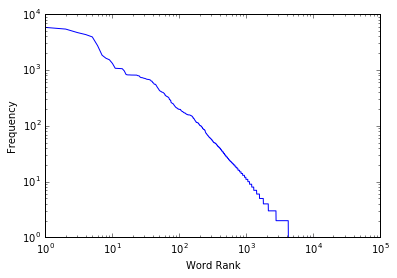

In [52]:
%matplotlib inline
from collections import Counter
import matplotlib.pyplot as plt
"""
Plots frequencies of word rank to frequency of that word. 
For words of rankings, see the word count table above.
"""
word_counts = sorted(Counter(words).values(), reverse=True)
plt.loglog(word_counts)
plt.ylabel("Frequency")
plt.xlabel("Word Rank")

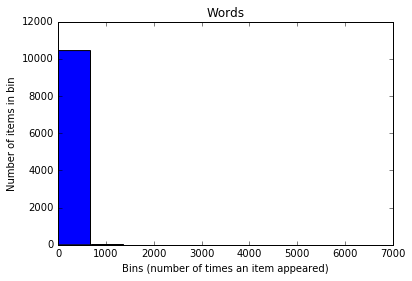

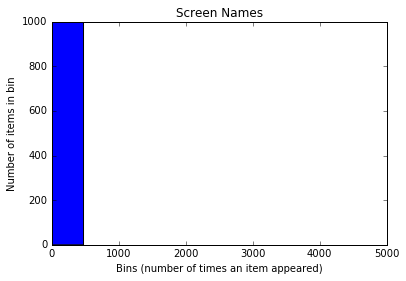

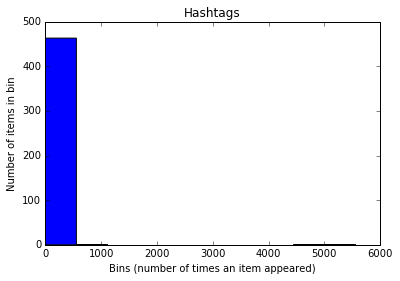

In [53]:
%matplotlib inline
"""
Generates histograms of words, screen names, and hashtags.
    NOTE: un-comment second plt.hist to add specified bins and range
"""

for label, data in (('Words', words), 
                    ('Screen Names', screen_names), 
                    ('Hashtags', hashtags)):

    # Build a frequency map for each set of data
    # and plot the values
    c = Counter(data)
    plt.hist(c.values())
    # plt.hist(c.values(), 6, range = [0, 30])   # NOTE: Can change number of bins and range if needed
    
    # Add a title and y-label ...
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    # ... and display as a new figure
    plt.figure()

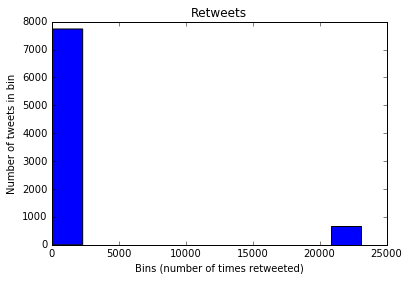

In [54]:
"""
Generates histogram of retweet counts of tweets
    NOTE: Can adjust number of bins and range similar to above
"""
counts = [count for count, _, _ in retweets]

plt.hist(counts)
plt.title("Retweets")
plt.xlabel('Bins (number of times retweeted)')
plt.ylabel('Number of tweets in bin')

#print counts

In [ ]:
"""
Utilize twitters REST API rather than Streaming API
    This api has ability to use operators and collect tweets during certain time frames (6-9 weeks worth stated by twitter)


You can add Query operators to the query search. See: https://dev.twitter.com/rest/public/search
Examples:
    'beer pokemon' : will search for words containing both "beer" and "pokemon" anywhere in tweet
    '"beer pokemon"'   : will search for exact phrase "beer pokemon"
    'beer OR pokemon' : will search for tweets with either "beer" and/or "pokemon"
    'pokemon :)' : will search tweets for pokemon in a positive attitude
    'beer :('    : will search tweets for beer in a negative attitude
    
"""
q = '(pokemon OR #Pokemon20 OR #TrainOn) (#SB50 OR #SuperBowl OR super bowl OR commercial OR ad)' # the query to search in twitter, remember can add operators!
              
filename = 'pokemon13k6pm-11pm.json' # the file to save your twitter data to (REPLACE). 
                                  # Will delete data if to file if it already exists
max_results = 100000 # max number of tweets to collect. Keep as multiples of 100.
count = 100 # the amount of max tweets to collect in each batch

since_id = 696468492183347202  # only collects tweets after this id, works better than since operator
                               # there are clock twitter accounts that post on the hour for easy ids
max_id = 696543986031394817 # only collects tweets before this id was made, works better than until operator

# Sample IDs to use as time stamp references
# 696317746406105088 - 8am Sunday
# 696468492183347202 - 6pm Sunday
# 696543986031394817 - 11pm Sunday


#--------------------------

import twitter
from urllib import unquote
import json
import math
import urllib


def oauth_login():
    """
    Logs into twitter using the following keys.
    """
    # Go to http://twitter.com/apps/new to create an app and get values
    # for these credentials that you'll need to provide in place of these
    # empty string values that are defined as placeholders.
    # See https://dev.twitter.com/docs/auth/oauth for more information 
    # on Twitter's OAuth implementation.
    
    CONSUMER_KEY = '1Y71E7ltFJjaouxc04YAdYcFG'
    CONSUMER_SECRET ='KO9VifpzCanKjlfCzX2KGpjheCkPYzhzygKLQvbPmm0r88qGwr'
    OAUTH_TOKEN = '467864818-LAMaMeV50N8opXd18InibfDmxJ3QQiu1j2N0SS4E'
    OAUTH_TOKEN_SECRET = '7MOHEBrgdCQAjVAWbLEhNV6FoD98TdzinmAFMaleBoz0N'
    
    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                               CONSUMER_KEY, CONSUMER_SECRET)
    
    twitter_api = twitter.Twitter(auth=auth)
    return twitter_api


def save_json(filename, data):
    """
    Saves a json file (data) to a file (filename).
        filename = name of the file to write to as a string
        data     = the data collected from twitter
    NOTE: If the filename already exists on current working directory data will
          be appended to that file. If the filename does not already exist then
          one will be created and written to. *May get slow the larger the files*
    """

    with open(filename,'w') as file: # 'a' means open a file to 'append'
        file.write(unicode(json.dumps(data, indent=1)))


def twitter_search(twitter_api, q, count, max_results):
    """
    Uses an authorized twitter_api to do a search with a given hot topic (q).
        count: the number of tweets to return per page, up to a maximum 100.
        max_results: maximum tweets to return in total (should be between 200 and 100,000 ).
    
    """
    q = urllib.quote_plus(q) # URL encodes search query q to include operators
    
    # See https://dev.twitter.com/docs/api/1.1/get/search/tweets
    search_results = twitter_api.search.tweets(q=q, count=count, since_id=since_id, max_id=max_id)
    statuses = search_results['statuses']

    # Iterate through numBatches batches of results by following the cursor
    numBatches = math.floor(max_results/100) # number of batches of 100 tweets (chose to round down to nearest 100)
    numBatches = int(numBatches) # convert float to int
    for _ in range(numBatches):
        print "Length of statuses", len(statuses)
        try:
            next_results = search_results['search_metadata']['next_results']
        except KeyError, e: # No more results when next_results doesn't exist
            break
        # Create a dictionary from next_results, which has the following form:
        # ?max_id=313519052523986943&q=NCAA&include_entities=1
        kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])

        search_results = twitter_api.search.tweets(**kwargs)
        statuses += search_results['statuses']

        if len(statuses) >= max_results:
            break

    print "    Amount of tweets collected: %d" %len(statuses) # prints actual number of tweets collected incase rate limited
    save_json(filename, statuses) # save data collected in statuses, WILL DELETE OLD FILE IF EXISTED!
    print "    Saved tweets as json to: %s" %filename # reminds what file was saved
    

twitter_api = oauth_login() # gets authorization to twitter_api
twitter_search(twitter_api, q, count, max_results) # collect twitter data



In [ ]:
import time
import json
import string
import nltk
import os
"""
Returns the number of tweets from each json file of tweets collected which are stored in directory.
""" 
directory = 'C:\Users\Branden\Documents\DS 501\JSON Data' # change this to your directory
for filename in os.listdir(directory): 
    if filename == '.ipynb_checkpoints':
        print 0
    elif filename == 'casestudy1.ipynb4':
        print 0
    else:
        statuses = json.loads(open(filename).read()) # load data from the saved json file
        print filename
        print len(statuses)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What data you collected? 
    * Why this topic is interesting or important to you? (Motivations)
    * How did you analyse the data?
    * What did you find in the data? 
 
     (please include figures or tables in the report, but no source code)

Please compress all the files in a zipped file.


** How to submit: **

        Please submit through myWPI, in the Assignment "Case Study 1".
        
** Note: Each team just need to submit one submission in myWPI **

# Grading Criteria:

** Totoal Points: 120 **


---------------------------------------------------------------------------
** Notebook:  **
    Points: 80


    -----------------------------------
    Qestion 1:
    Points: 20
    -----------------------------------
    
    (1) Select a topic that you are interested in.
    Points: 6 
    
    (2) Use Twitter Streaming API to sample a collection of tweets about this topic in real time. (It would be recommended that the number of tweets should be larger than 200, but smaller than 1 million. Please check whether the total number of tweets collected is larger than 200?
    Points: 10 
    
    
    (3) Store the tweets you downloaded into a local file (txt file or json file)
    Points: 4 
    
    
    -----------------------------------
    Qestion 2:
    Points: 20
    -----------------------------------
    
    1. Word Count

    (1) Use the tweets you collected in Problem 1, and compute the frequencies of the words being used in these tweets.
    Points: 4 

    (2) Plot a table of the top 30 words with their counts 
    Points: 4 
    
    2. Find the most popular tweets in your collection of tweets
    plot a table of the top 10 tweets that are the most popular among your collection, i.e., the tweets with the largest number of retweet counts.
    Points: 4 
    
    3. Find the most popular Tweet Entities in your collection of tweets

    (1) plot a table of the top 10 hashtags, 
    Points: 4 

    (2) top 10 user mentions that are the most popular in your collection of tweets.
    Points: 4 
    
    
    -----------------------------------
    Qestion 3:
    Points: 20
    -----------------------------------
    
    (1) choose a popular twitter user who has many followers, such as "ladygaga".
    Points: 4 

    (2) Get the list of all friends and all followers of the twitter user.
    Points: 4 

    (3) Plot 20 out of the followers, plot their ID numbers and screen names in a table.
    Points: 4 

    (4) Plot 20 out of the friends (if the user has more than 20 friends), plot their ID numbers and screen names in a table.
    Points: 4 
    
    (5) Compute the mutual friends within the two groups, i.e., the users who are in both friend list and follower list, plot their ID numbers and screen names in a table
    Points: 4 
  
    -----------------------------------
    Qestion 4:  Explore the data
    Points: 20
    -----------------------------------
        Novelty: 10
        Interestingness: 10
    -----------------------------------
    Run some additional experiments with your data to gain familiarity with the twitter data ant twitter API




---------------------------------------------------------------------------
** Report: communicate the results**
    Points: 20

(1) What data you collected?
    Points: 5 

(2) Why this topic is interesting or important to you? (Motivations)
    Points: 5 

(3) How did you analyse the data?
    Points: 5 

(4) What did you find in the data?
(please include figures or tables in the report, but no source code)
    Points: 5 



---------------------------------------------------------------------------
** Slides (for 10 minutes of presentation): Story-telling **
    Points: 20


1. Motivation about the data collection, why the topic is interesting to you.
    Points: 5 

2. Communicating Results (figure/table)
    Points: 10 

3. Story telling (How all the parts (data, analysis, result) fit together as a story?)
    Points: 5 

